In [1]:
# load csv file with events
data_file = "/nfs/a319/gy17m2a/PhD/test_data.csv"

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd

###################################
### Loading and processing info ###
###################################

# load csv file with events
data_file = "/nfs/a319/gy17m2a/PhD/test_data.csv"
data = pd.read_csv(data_file, encoding='iso-8859-1')

# fix excel-formatting error in the original flood list, where Startdato half way through the list changes format
# data["Startdato"][465:] = [data["Startdato"][elem][:6] + "20" + data["Startdato"][elem][6:] for elem in range(465,len(data))]

data["Startdato"] = pd.to_datetime(data["Startdato"], format="%d/%m/%Y")

data["Fluvial"] = data["Fluvial"].notna()
data["Pluvial"] = data["Pluvial"].notna()
data["Stormflod"] = data["Stormflod"].notna()

# check validity of municipalities, incl uniques (mispells, caps, etc.)
flooded_municipalities = sorted(data["Kommune"].unique())
# generate data frame with floods per municipality
floods_by_municipalities = data["Kommune"].value_counts()

###################################

# generate data frames for floods per day, per year, and per type
floods_per_day = data["Startdato"].value_counts()
floods_per_year = pd.DatetimeIndex(data["Startdato"]).year.value_counts()

floods_per_year = floods_per_year.sort_index()

data_flood_type = data[["Startdato","Pluvial", "Fluvial","Stormflod"]]
data_flood_type.columns = ["Year", "Urban pluvial", "Fluvial (river/lake)", "Storm surge (coast)"]
data_flood_type["Year"] = pd.DatetimeIndex(data_flood_type["Year"]).year
data_flood_type = data_flood_type[["Year", "Storm surge (coast)", "Fluvial (river/lake)", "Urban pluvial"]]
flood_type = data_flood_type.groupby(by = ["Year"]).sum()
flood_type = flood_type[:-1]


FileNotFoundError: [Errno 2] No such file or directory: '/nfs/a319/gy17m2a/PhD/test_data.csv'

In [ ]:
##################################################
####### Bar plots of floods by year ##############
##################################################

# plot of floods over time, annual summary + daily summary

#ax = floods_per_year.plot.bar(floods_per_year)
#fig, ax = plt.subplots(figsize=(8,15))
fig, ax = flood_type.plot.bar(stacked=False, color=["black", "green", "orange"], rot=45, width=.8)
plt.xlabel("")
plt.ylabel("Number of flooded locations")
plt.legend(frameon=False)
#plt.rcParams["figure.figsize"] = (10,5)
#plt.savefig("/home/jope/development/infomedia_tools/EGU24/num_flooded_locations_by_year_2007_2020.png")


fig, ax = flood_type.plot.bar(stacked=True, color=["black", "green", "orange"], rot=45)
plt.xlabel("")
ax.set_ylabel("Number of flooded locations")
plt.legend(frameon=False)

fig, ax = flood_type.plot.bar(stacked=False, color=["black", "green", "orange"], rot=45, width=.8)
plt.xlabel("")
plt.ylabel("Number of flooded locations")
plt.legend(frameon=False)

fig, ax = plt.subplots(1,3, sharex=True, sharey=True)
flood_type['Storm surge (coast)'].plot.bar(ax=ax[0], color="black", rot=45, title='Storm surge (coast)')
flood_type['Fluvial (river/lake)'].plot.bar(ax=ax[1], color="green", rot=45, title='Fluvial (river/lake)')
flood_type['Urban pluvial'].plot.bar(ax=ax[2], color="orange", rot=45, title='Urban pluvial')
ax[0].set_ylabel("Number of flooded locations")
[ax[i].set_xlabel("") for i in range(0,3)]


In [ ]:
data

In [ ]:
########################################
####### Annual Wheel Plot ##############
########################################
flood_type_int = np.zeros(len(data_flood_type))
flood_type_int[data_flood_type["Urban pluvial"]] = 0
flood_type_int[data_flood_type["Storm surge (coast)"]] = 1
flood_type_int[data_flood_type["Fluvial (river/lake)"]] = 2

D =  data["Startdato"].dt.dayofyear # flood_index_day_of_year

theta = D*2*np.pi/365.25
x = np.cos(theta)
y = np.sin(theta)
x

In [ ]:
calc_mean_day_and_dispersion(x[0],y[0])

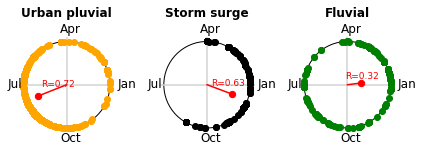

In [17]:
########################################
####### Annual Wheel Plot ##############
########################################
flood_type_int = np.zeros(len(data_flood_type))
flood_type_int[data_flood_type["Urban pluvial"]] = 0
flood_type_int[data_flood_type["Storm surge (coast)"]] = 1
flood_type_int[data_flood_type["Fluvial (river/lake)"]] = 2

D =  data["Startdato"].dt.dayofyear # flood_index_day_of_year

theta = D*2*np.pi/365.25
x = np.cos(theta)
y = np.sin(theta)

def calc_mean_day_and_dispersion(x_i, y_i):
    x_mean = np.mean(x_i)
    y_mean = np.mean(y_i)
    
    if x_mean <= 0:
        D_mean = (np.arctan(y_mean/x_mean) + np.pi) * 365.25/(2*np.pi)
    elif x_mean > 0 and y_mean >= 0:
        D_mean = np.arctan(y_mean/x_mean) * 365.25/(2*np.pi)
    elif x_mean > 0 and y_mean < 0:
        D_mean = (np.arctan(y_mean/x_mean) + 2*np.pi) * 365.25/(2*np.pi)
    
    R = np.sqrt(x_mean**2 + y_mean**2)

    return(x_mean, y_mean, D_mean, R)

x_mean = np.zeros(3)
y_mean = np.zeros(3)
D_mean = np.zeros(3)
R = np.zeros(3)
for i in range(0,3):
    x_mean[i], y_mean[i], D_mean[i], R[i] = calc_mean_day_and_dispersion(x[flood_type_int==i], y[flood_type_int==i])


color_list = ["orange", "black", "green"]
title_list = ["Urban pluvial", "Storm surge", "Fluvial"]

fig, ax = plt.subplots(1,3,sharex=True, sharey=True, frameon=False)
for i in range(0,3):
    # draw background lines and circle
    circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
    ax[i].add_patch(circ)
    ax[i].axhline(color="lightgrey", xmin=0, xmax=1, zorder=1)
    ax[i].axvline(color="lightgrey", ymin=0, ymax=1, zorder=1)  
    

    # plot individual flood dates
    ax[i].scatter(x[flood_type_int==i], y[flood_type_int==i], color=color_list[i])
    # plot mean flood day
    ax[i].scatter(x_mean[i], y_mean[i], color="r", s=40)
    ax[i].plot([0, x_mean[i]], [0, y_mean[i]], color="r")
    ax[i].text(0.5 + x_mean[i]/4 - 0.1, 0.5 + y_mean[i]/4 + 0.05, "R={0:.2f}".format(R[i]), transform=ax[i].transAxes, size=9, color="r")
    
    #ax[i].scatter(x_mean[i]*(1/R[i]), y_mean[i]*(1/R[i]), color="r") # continue to the edge of the unit circle
        
    ax[i].set_title(title_list[i], y = 1.15, fontweight="bold")
    ax[i].set_xlim(-1.1,1.1)
    ax[i].set_ylim(-1.1,1.1)
    ax[i].set_aspect(1)
    ax[i].axis("off")
    
    ax[i].text(1.03, 0.47, "Jan", transform=ax[i].transAxes, size=12)
    ax[i].text(0.43, 1.05, "Apr", transform=ax[i].transAxes, size=12)
    ax[i].text(-0.125, 0.47, "Jul", transform=ax[i].transAxes, size=12)
    ax[i].text(0.43, -0.1, "Oct", transform=ax[i].transAxes, size=12)
    
    fig.tight_layout()
    
    

In [10]:


# plt.savefig("/home/jope/development/infomedia_tools/EGU24/annual_wheel_of_floods_2007_2020.png",
#             facecolor="white")



###################################################
####### Density plots of seasonality ##############
###################################################



#D[flood_type_int==1].plot.hist(bins=12)

D_appended = D.copy()
D_appended = pd.concat([D_appended, D-365, D+365], ignore_index=True)

# Standard kernel density plots will be wrong for the first and last dates in a year, because the data is circular (i.e. December's value should impact January's value during smoothing).
# We therefore add/concatenate identical data before the start and after the end of the data (these added data are later removed / not plotted).
flood_type_int_appended = np.concatenate((flood_type_int, flood_type_int, flood_type_int))

# kernel density plot
bw_method_smoothing = 0.05
fig, ax = plt.subplots(1,1)
D_appended[flood_type_int_appended==0].plot.kde(bw_method=bw_method_smoothing, color="orange", label="Urban Pluvial")
D_appended[flood_type_int_appended==1].plot.kde(bw_method=bw_method_smoothing, color="black", label="Storm surge")
D_appended[flood_type_int_appended==2].plot.kde(bw_method=bw_method_smoothing, color="green", label="Fluvial")
ax.set_xlim(0,365)
ax.set_xlabel("Day of year (0-365)")
plt.legend(frameon=False)

# check to see that the added/concatenated data look right in histogram format (running this line independantly of previous plot)
plt.figure()
D_appended.plot.hist(bins=36)
# same check in density format
plt.figure()
D_appended.plot.kde()

plt.figure()
D[flood_type_int==0].plot.kde()
D[flood_type_int==1].plot.kde()
D[flood_type_int==2].plot.kde()

plt.figure()
x[flood_type_int==0].plot.kde()
x[flood_type_int==1].plot.kde()
x[flood_type_int==2].plot.kde()

plt.figure()
theta[flood_type_int==0].plot.kde()
theta[flood_type_int==1].plot.kde()
theta[flood_type_int==2].plot.kde()



##########################################
####### Circular Histograms ##############
##########################################

N = 12
bottom = 8
max_height = 4

circular_bins = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
circular_bins = np.append(circular_bins, 2 * np.pi)
circular_plot_position = circular_bins + 0.5*np.diff(circular_bins)[0]
circular_plot_position = circular_plot_position[:-1]
circular_plot_position = circular_plot_position + 0.5*np.pi

count0, division0 = np.histogram(theta[flood_type_int==0], bins = list(circular_bins))
count1, division1 = np.histogram(theta[flood_type_int==1], bins = list(circular_bins))
count2, division2 = np.histogram(theta[flood_type_int==2], bins = list(circular_bins))

radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

fig = plt.figure
ax0 = plt.subplot(131, polar=True)
ax0.bar(circular_plot_position, count0, width=width, bottom=bottom, color="orange")
ax1 = plt.subplot(132, polar=True)
ax1.bar(circular_plot_position, count1, width=width, bottom=bottom, color="black")
ax2 = plt.subplot(133, polar=True)
ax2.bar(circular_plot_position, count2, width=width, bottom=bottom, color="green")

ax0.set_title("Urban Pluvial")
ax1.set_title("Storm surge")
ax2.set_title("Fluvial")


ax0.set_rlabel_position(90)
ax1.set_rlabel_position(90)
ax2.set_rlabel_position(90)

ax0.xaxis.grid(False)
ax1.xaxis.grid(False)
ax2.xaxis.grid(False)

ax0.set_xticks(circular_plot_position - 0.5*np.pi)
ax1.set_xticks(circular_plot_position - 0.5*np.pi)
ax2.set_xticks(circular_plot_position - 0.5*np.pi)

ax0.set_xticklabels(['Oct', 'Nov', 'Dec',
                    'Jan', 'Feb', 'Mar', 
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',])
ax1.set_xticklabels(['Oct', 'Nov', 'Dec',
                    'Jan', 'Feb', 'Mar', 
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',])
ax2.set_xticklabels(['Oct', 'Nov', 'Dec',
                    'Jan', 'Feb', 'Mar', 
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',])



###########################
########## Maps ###########
###########################


# Municipality map

municipalities_file = "/home/jope/Documents/infomedia/nckf_symp/DNK_ADM2_fixedInternalTopology.shp"

municipalities_map = gpd.read_file(municipalities_file)

# manual edits due to not being able to read Danish letters
manual_index = [3, 9, 10, 11, 12, 18, 19, 22, 24, 27, 28, 29, 30, 38, 42, 47,
                49, 54, 57, 59, 60, 63, 64, 65, 75, 82, 83, 88, 91, 95]
manual_names = ["Ishøj", "Allerød", "Holbæk", "Vallensbæk", "Rødovre", "Fanø",
     "Brøndby", "Furesø", "Sorø", "Halsnæs", "Hørsholm", "Hillerød",
     "Tønder", "Morsø", "København", "Solrød", "Ringkøbing-Skjern", "Næstved", 
     "Ærø", "Tårnby", "Dragør", "Brønderslev", "Køge", "Læsø",
     "Samsø", "Hjørring", "Høje-Taastrup", "Lyngby-Taarbæk",
     "Helsingør", "Sønderborg"]


municipalities_map["shapeName"][manual_index] = manual_names

# sort the shapefile alphabetically
municipalities_map = municipalities_map.sort_values("shapeName").reset_index(drop=True)



data_municipality = data[["Startdato", "Kommune", "Pluvial", "Fluvial","Stormflod"]]
flooded_municipalities_pluvial = data_municipality[data_municipality["Pluvial"]]["Kommune"].value_counts().sort_index()
flooded_municipalities_stormsurge = data_municipality[data_municipality["Stormflod"]]["Kommune"].value_counts().sort_index()
flooded_municipalities_fluvial = data_municipality[data_municipality["Fluvial"]]["Kommune"].value_counts().sort_index()


municipalities_map["pluvial_cases"] = 0
municipalities_map["stormsurge_cases"] = 0
municipalities_map["fluvial_cases"] = 0
municipalities_map["total_cases"] = 0

municipalities_map["pluvial_cases"][municipalities_map["shapeName"].isin(flooded_municipalities_pluvial.index)] = flooded_municipalities_pluvial.values
municipalities_map["stormsurge_cases"][municipalities_map["shapeName"].isin(flooded_municipalities_stormsurge.index)] = flooded_municipalities_stormsurge.values
municipalities_map["fluvial_cases"][municipalities_map["shapeName"].isin(flooded_municipalities_fluvial.index)] = flooded_municipalities_fluvial.values
# debugging for figuring out spelling mistakes and spaces in names...
# municipalities_map["shapeName"][~municipalities_map["shapeName"].isin(flooded_municipalities_stormsurge.index)]
# flooded_municipalities_stormsurge[~flooded_municipalities_stormsurge.index.isin(municipalities_map["shapeName"])].index
municipalities_map["total_cases"] = municipalities_map["pluvial_cases"] + municipalities_map["stormsurge_cases"] + municipalities_map["fluvial_cases"]


municipalities_map.to_file("/home/jope/development/infomedia_tools/EGU24/Municipality_fluvialflooded_2007_2020.shp")






AttributeError: Can only use .dt accessor with datetimelike values